In [20]:
!pip install panda

  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7239 sha256=f27aeccc0f80b716cd66b88fd62353f5852b8afa1bb6e5cea484640385634426
  Stored in directory: /root/.cache/pip/wheels/0e/8b/c3/ff9cbde1fffd8071cff8367a86f0350a1ce30a8d31b6a432e9
Successfully built panda


In [21]:
import pandas as pd


datos = pd.read_csv("/content/train.csv")

In [22]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

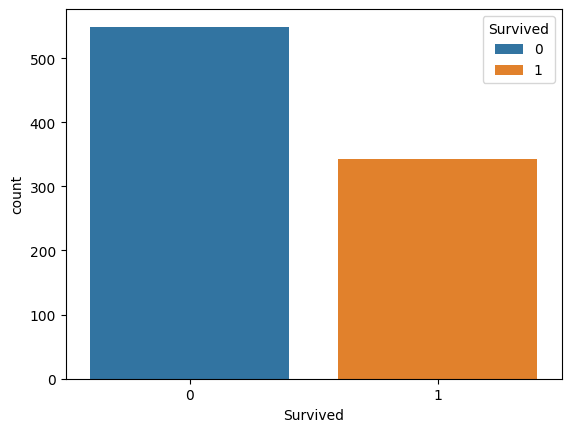

In [24]:
import seaborn as sb

sb.countplot(x="Survived", data=datos, hue="Survived")

<Axes: xlabel='Survived', ylabel='count'>

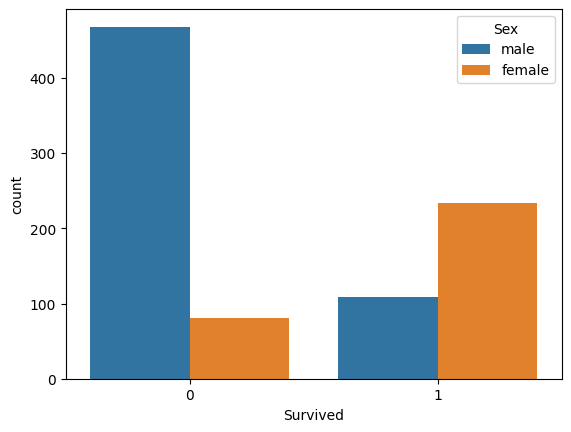

In [25]:
sb.countplot(x="Survived", data=datos, hue="Sex")

In [26]:
datos.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
datos.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

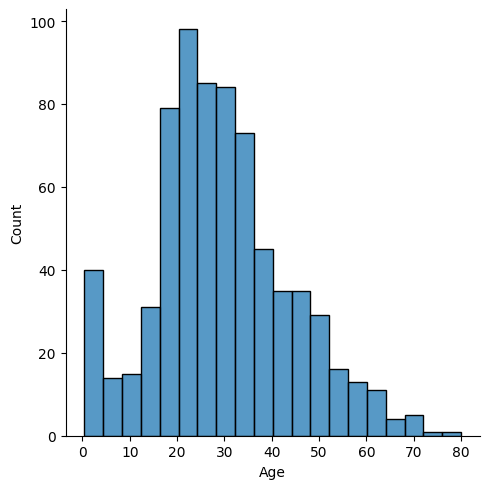

In [28]:
sb.displot(x="Age", data=datos)

In [29]:
datos["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [30]:
datos["Age"].mean()

29.69911764705882

In [31]:
datos["Age"]=datos["Age"].fillna(datos['Age'].mean())

In [32]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
datos=datos.drop(["Cabin"],axis=1)

In [34]:
datos.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [35]:
datos["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
datos=datos.drop(["Embarked"], axis=1)

In [37]:
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [38]:
datos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [39]:
pd.get_dummies(datos["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [40]:
dummies_sex=pd.get_dummies(datos["Sex"], drop_first=True)

In [41]:
datos=datos.join(dummies_sex)

datos=datos.drop(["Sex"],axis=1)

In [42]:
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


<Axes: >

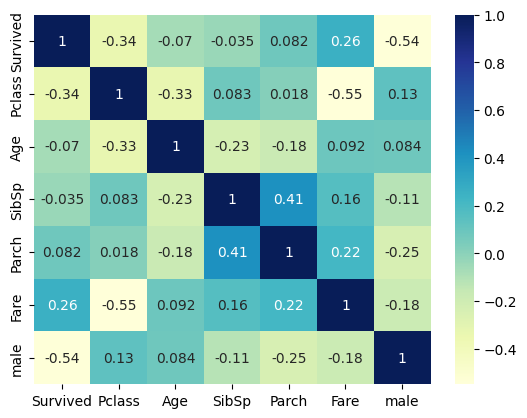

In [43]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

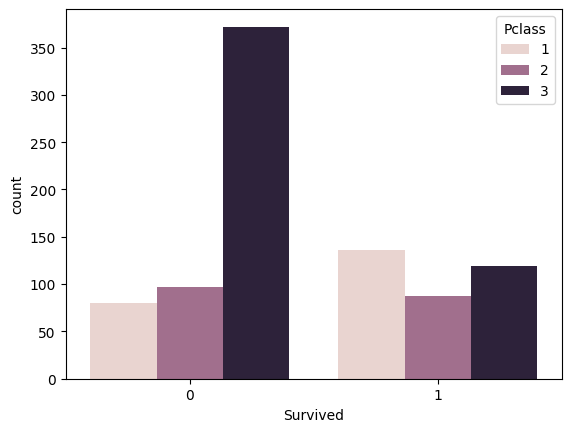

In [48]:
sb.countplot(x="Survived",data=datos, hue="Pclass")

In [50]:
X=datos.drop(["Survived"], axis=1)
y=datos["Survived"]

In [51]:
from sklearn.model_selection import train_test_split
X_ent,X_pru, y_ent, y_pru = train_test_split(X, y, test_size =.2)

In [53]:
from sklearn.linear_model import LogisticRegression

modelo=LogisticRegression()

modelo.fit(X_ent, y_ent)

LogisticRegression()

In [54]:
predicciones = modelo.predict(X_pru)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.8100558659217877

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pru, predicciones)

array([[95, 19],
       [15, 50]])

In [60]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred:No", "Pred:Si"], index=["Real:No", "Real:Si"])

,Pred:No,Pred:Si
Real:No,95,19
Real:Si,15,50


In [61]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [82]:
nueva_persona = [2, 50, 0, 0, 50, 1]

prediccion = modelo.predict([nueva_persona])

if prediccion[0]== 1:
  print("Vivido")
else:
  print("Yama maste")

Yama maste


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
